# Maximizing ROI: Analyzing the Impact of Ad Spend on Website Performance

This project simulates a marketing analytics scenario for a small business. Our goal is to examine how advertising spend impacts sessions, conversions, and revenue over time.

We'll explore:

- Seasonal performance patterns
- Return on ad spend (ROAS)
- Efficiency of conversion relative to ad investment


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("../data/seo_ad_performance_dataset.csv")
df["Month"] = pd.Categorical(df["Month"], categories=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
df = df.sort_values("Month")
df.head()


,Month,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($)
0,Jan,5174,10498,2.53,265,15429.98
1,Feb,5507,13399,2.30,308,13895.64
2,Mar,2860,6579,2.84,186,7802.99
3,Apr,3294,7754,2.04,158,10817.72
4,May,3130,6292,2.30,144,9931.53


## 📊 Data Overview

Let's get a quick summary of the data types and basic stats.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Month                12 non-null     category
 1   Ad Spend ($)         12 non-null     int64   
 2   Sessions             12 non-null     int64   
 3   Conversion Rate (%)  12 non-null     float64 
 4   Conversions          12 non-null     int64   
 5   Revenue ($)          12 non-null     float64 
dtypes: category(1), float64(2), int64(3)
memory usage: 1016.0 bytes


In [4]:
df.describe()

,Ad Spend ($),Sessions,Conversion Rate (%),Conversions,Revenue ($)
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3952.916667,8820.000000,2.470000,218.416667,11501.710833
std,1145.050095,2756.317174,0.362567,79.575531,3416.526268
min,2466.000000,5307.000000,1.880000,137.000000,6505.510000
25%,3121.250000,7138.500000,2.260000,155.750000,9304.775000
50%,3466.000000,7722.000000,2.475000,186.000000,11384.290000
75%,5112.500000,10554.500000,2.705000,275.750000,14017.130000
max,5772.000000,13946.000000,3.130000,359.000000,17640.690000


## 📈 Visualizing Trends Over the Year
How do our key performance metrics change over time?

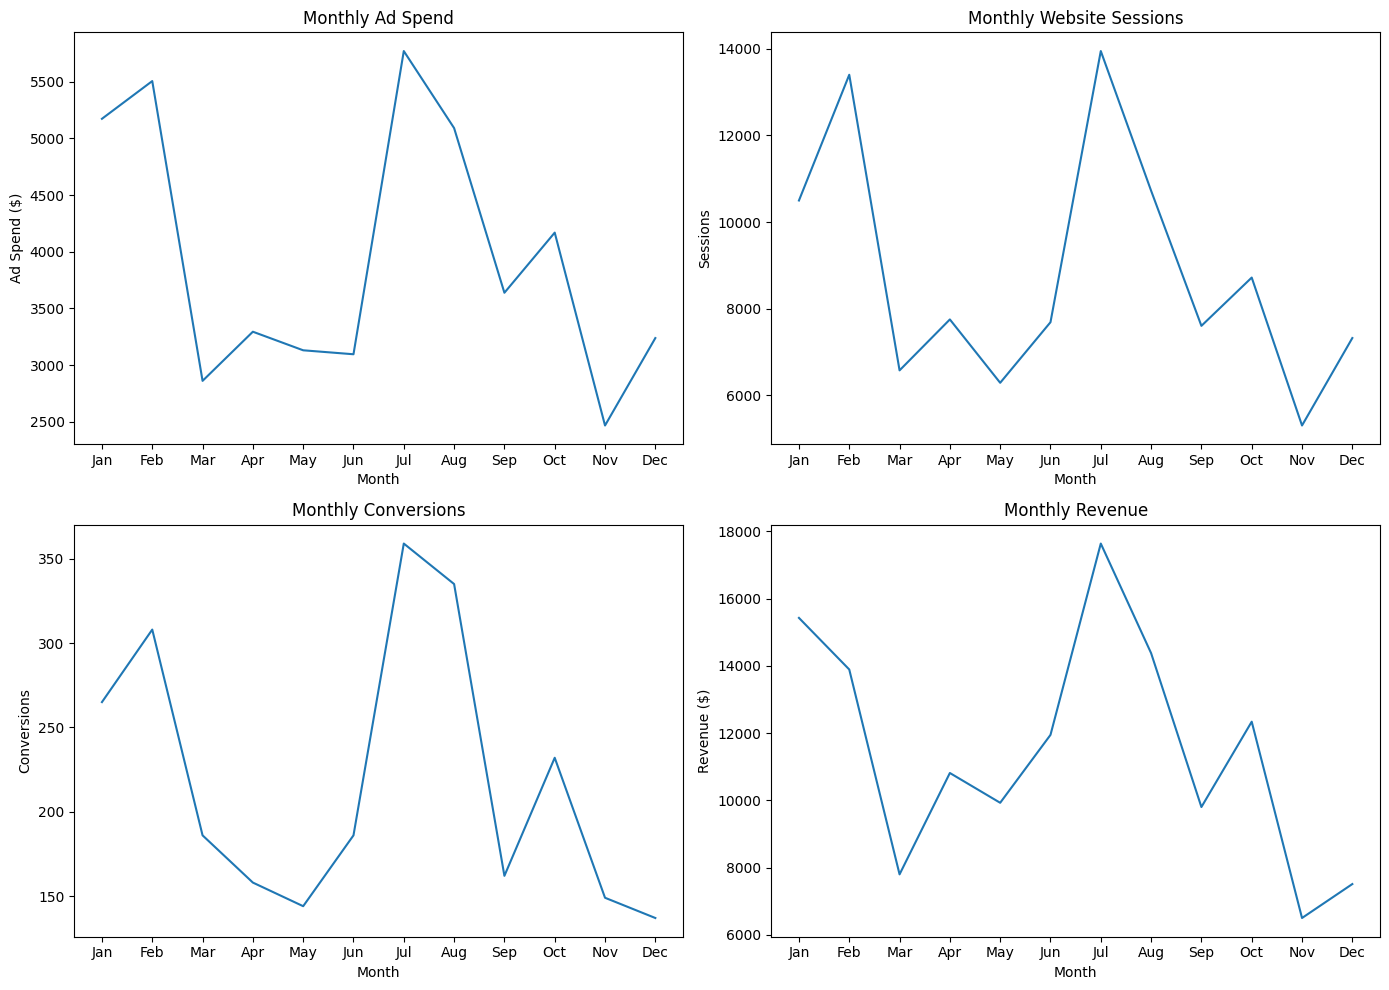

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

sns.lineplot(data=df, x="Month", y="Ad Spend ($)", ax=axs[0,0]).set_title("Monthly Ad Spend")
sns.lineplot(data=df, x="Month", y="Sessions", ax=axs[0,1]).set_title("Monthly Website Sessions")
sns.lineplot(data=df, x="Month", y="Conversions", ax=axs[1,0]).set_title("Monthly Conversions")
sns.lineplot(data=df, x="Month", y="Revenue ($)", ax=axs[1,1]).set_title("Monthly Revenue")

plt.tight_layout()
plt.show()


## 📉 Efficiency & ROI Check

Let’s compare ad spend to revenue directly and see how efficient each month was.

/var/folders/17/njh92ccn75l5xb8knljb82tc0000gn/T/ipykernel_5245/2361768659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Month", y="ROAS", palette="viridis")


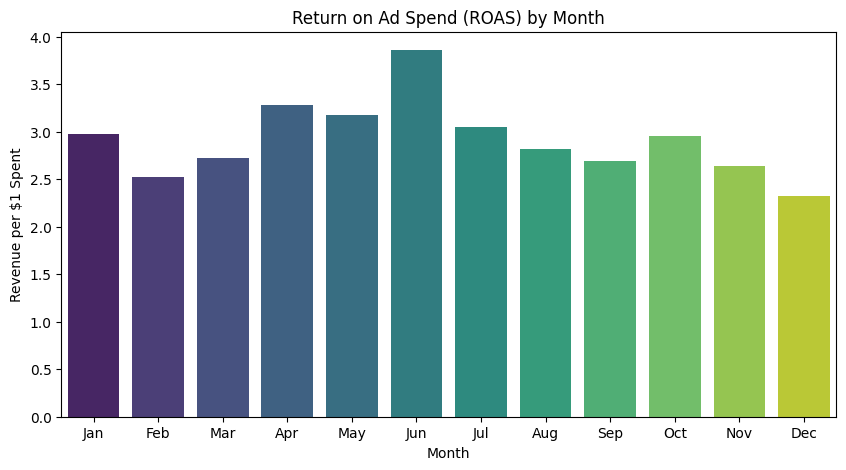

In [8]:
# Calculate ROAS: Return on Ad Spend
df["ROAS"] = df["Revenue ($)"] / df["Ad Spend ($)"]

# Plot ROAS
plt.figure(figsize=(10,5))
sns.barplot(data=df, x="Month", y="ROAS", palette="viridis")
plt.title("Return on Ad Spend (ROAS) by Month")
plt.ylabel("Revenue per $1 Spent")
plt.show()


## 📌 Correlation Analysis

Which factors are most strongly related to revenue?

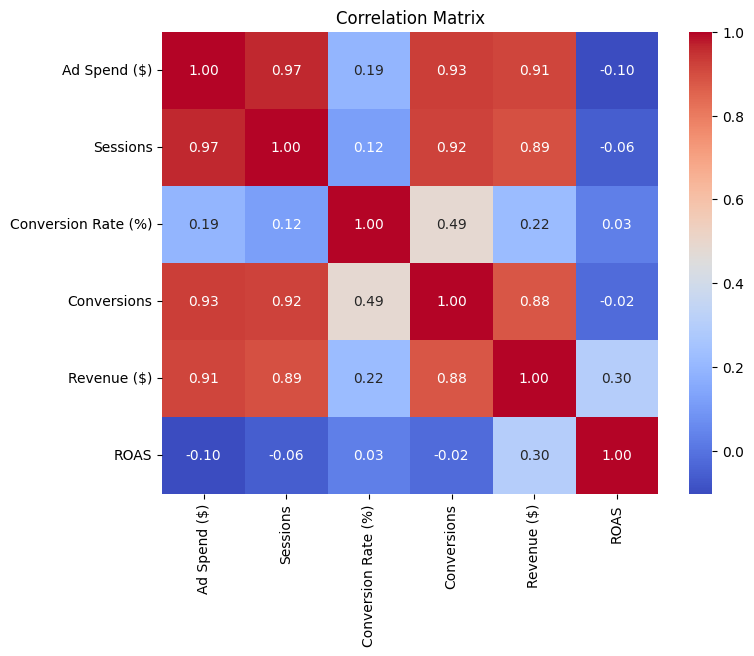

In [7]:
# Clean correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

## 🧠 Insights

- Which month had the highest ROAS?
- Did high ad spend always lead to more conversions?
- Where could the business cut costs without hurting revenue?

These insights help prioritize marketing strategy and optimize budget allocation.

---

## ✅ Next Steps

This analysis could easily be expanded to include:

- Multi-channel comparison (SEO vs Social vs Paid Ads)
- Landing page performance
- A/B testing outcomes

You’re now ready to show off your analytical skills for SEO or Marketing Analyst roles!